In [ ]:
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 13.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import holoviews as hv
from prophet import Prophet
import hvplot.pandas
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sample5.csv to Sample5.csv


In [ ]:
laundering_data = pd.read_csv(
    "Sample5.csv",
    parse_dates=True,
    infer_datetime_format=True
)

laundering_data



Unnamed: 0.1  Unnamed: 0         Timestamp  From Bank    Account  \
0             67687     2244693  2022/09/04 18:45        220  80FD4ABB0   
1            236093       28714  2022/09/01 00:26       6129  803783EA0   
2            158830     2298029  2022/09/05 00:11     217959  80BB7AAF0   
3            308599     1370981  2022/09/02 07:41      24963  804886150   
4            362950     4289605  2022/09/09 02:02      14011  801EA7120   
...             ...         ...               ...        ...        ...   
10152        468589     3014910  2022/09/06 11:43         12  80C67D8B0   
10153        480524     2686374  2022/09/05 19:38      18196  8031438B0   
10154        169099     4196356  2022/09/08 23:06       1068  800F07400   
10155        238976      972523  2022/09/01 19:48       1024  8068B8B00   
10156         11180     1077205  2022/09/01 22:39        212  800098E10   

       To Bank  Account.1  Amount Received Receiving Currency  Amount Paid  \
0        45701  811953270          2316.73             Shekel      2316.73   
1         6129  803783EA0             4.65          US Dollar         4.65   
2       221279  81163FEF0            26.15               Euro        26.15   
3        29435  80E6F68A0          1366.01               Euro      1366.01   
4        13516  805581330          7442.38               Euro      7442.38   
...        ...        ...              ...                ...          ...   
10152    33727  80C7ECAA0         31394.07       Mexican Peso     31394.07   
10153   131928  80FF6AAD0           623.39               Yuan       623.39   
10154     1068  801A91CF0         14379.35          US Dollar     14379.35   
10155    16450  809802750        182314.26               Euro    182314.26   
10156   120292  80771F0B0           485.91           UK Pound       485.91   

      Payment Currency Payment Format  Is Laundering  
0               Shekel         Cheque              0  
1            US Dollar   Reinvestment              0  
2                 Euro    Credit Card              0  
3                 Euro    Credit Card              0  
4                 Euro         Cheque              0  
...                ...            ...            ...  
10152     Mexican Peso    Credit Card              0  
10153             Yuan           Cash              0  
10154        US Dollar         Cheque              0  
10155             Euro         Cheque              0  
10156         UK Pound         Cheque              0  

[10157 rows x 13 columns]

In [ ]:
laundering_data

Unnamed: 0.1  Unnamed: 0         Timestamp  From Bank    Account  \
0             67687     2244693  2022/09/04 18:45        220  80FD4ABB0   
1            236093       28714  2022/09/01 00:26       6129  803783EA0   
2            158830     2298029  2022/09/05 00:11     217959  80BB7AAF0   
3            308599     1370981  2022/09/02 07:41      24963  804886150   
4            362950     4289605  2022/09/09 02:02      14011  801EA7120   
...             ...         ...               ...        ...        ...   
10152        468589     3014910  2022/09/06 11:43         12  80C67D8B0   
10153        480524     2686374  2022/09/05 19:38      18196  8031438B0   
10154        169099     4196356  2022/09/08 23:06       1068  800F07400   
10155        238976      972523  2022/09/01 19:48       1024  8068B8B00   
10156         11180     1077205  2022/09/01 22:39        212  800098E10   

       To Bank  Account.1  Amount Received Receiving Currency  Amount Paid  \
0        45701  811953270          2316.73             Shekel      2316.73   
1         6129  803783EA0             4.65          US Dollar         4.65   
2       221279  81163FEF0            26.15               Euro        26.15   
3        29435  80E6F68A0          1366.01               Euro      1366.01   
4        13516  805581330          7442.38               Euro      7442.38   
...        ...        ...              ...                ...          ...   
10152    33727  80C7ECAA0         31394.07       Mexican Peso     31394.07   
10153   131928  80FF6AAD0           623.39               Yuan       623.39   
10154     1068  801A91CF0         14379.35          US Dollar     14379.35   
10155    16450  809802750        182314.26               Euro    182314.26   
10156   120292  80771F0B0           485.91           UK Pound       485.91   

      Payment Currency Payment Format  Is Laundering  
0               Shekel         Cheque              0  
1            US Dollar   Reinvestment              0  
2                 Euro    Credit Card              0  
3                 Euro    Credit Card              0  
4                 Euro         Cheque              0  
...                ...            ...            ...  
10152     Mexican Peso    Credit Card              0  
10153             Yuan           Cash              0  
10154        US Dollar         Cheque              0  
10155             Euro         Cheque              0  
10156         UK Pound         Cheque              0  

[10157 rows x 13 columns]

In [ ]:
laundering_data.set_index('Timestamp')

Unnamed: 0.1  Unnamed: 0  From Bank    Account  To Bank  \
Timestamp                                                                   
2022/09/04 18:45         67687     2244693        220  80FD4ABB0    45701   
2022/09/01 00:26        236093       28714       6129  803783EA0     6129   
2022/09/05 00:11        158830     2298029     217959  80BB7AAF0   221279   
2022/09/02 07:41        308599     1370981      24963  804886150    29435   
2022/09/09 02:02        362950     4289605      14011  801EA7120    13516   
...                        ...         ...        ...        ...      ...   
2022/09/06 11:43        468589     3014910         12  80C67D8B0    33727   
2022/09/05 19:38        480524     2686374      18196  8031438B0   131928   
2022/09/08 23:06        169099     4196356       1068  800F07400     1068   
2022/09/01 19:48        238976      972523       1024  8068B8B00    16450   
2022/09/01 22:39         11180     1077205        212  800098E10   120292   

                  Account.1  Amount Received Receiving Currency  Amount Paid  \
Timestamp                                                                      
2022/09/04 18:45  811953270          2316.73             Shekel      2316.73   
2022/09/01 00:26  803783EA0             4.65          US Dollar         4.65   
2022/09/05 00:11  81163FEF0            26.15               Euro        26.15   
2022/09/02 07:41  80E6F68A0          1366.01               Euro      1366.01   
2022/09/09 02:02  805581330          7442.38               Euro      7442.38   
...                     ...              ...                ...          ...   
2022/09/06 11:43  80C7ECAA0         31394.07       Mexican Peso     31394.07   
2022/09/05 19:38  80FF6AAD0           623.39               Yuan       623.39   
2022/09/08 23:06  801A91CF0         14379.35          US Dollar     14379.35   
2022/09/01 19:48  809802750        182314.26               Euro    182314.26   
2022/09/01 22:39  80771F0B0           485.91           UK Pound       485.91   

                 Payment Currency Payment Format  Is Laundering  
Timestamp                                                        
2022/09/04 18:45           Shekel         Cheque              0  
2022/09/01 00:26        US Dollar   Reinvestment              0  
2022/09/05 00:11             Euro    Credit Card              0  
2022/09/02 07:41             Euro    Credit Card              0  
2022/09/09 02:02             Euro         Cheque              0  
...                           ...            ...            ...  
2022/09/06 11:43     Mexican Peso    Credit Card              0  
2022/09/05 19:38             Yuan           Cash              0  
2022/09/08 23:06        US Dollar         Cheque              0  
2022/09/01 19:48             Euro         Cheque              0  
2022/09/01 22:39         UK Pound         Cheque              0  

[10157 rows x 12 columns]

In [ ]:
laundering_data.drop(columns=['From Bank','Account','To Bank','Account.1','Amount Received','Receiving Currency','Amount Paid','Payment Currency','Payment Format'],inplace=True)

In [ ]:
prophet_data=laundering_data.rename(columns={'Timestamp': 'ds','Is Laundering': 'y'})

In [ ]:
prophet_data

Unnamed: 0.1  Unnamed: 0                ds  y
0             67687     2244693  2022/09/04 18:45  0
1            236093       28714  2022/09/01 00:26  0
2            158830     2298029  2022/09/05 00:11  0
3            308599     1370981  2022/09/02 07:41  0
4            362950     4289605  2022/09/09 02:02  0
...             ...         ...               ... ..
10152        468589     3014910  2022/09/06 11:43  0
10153        480524     2686374  2022/09/05 19:38  0
10154        169099     4196356  2022/09/08 23:06  0
10155        238976      972523  2022/09/01 19:48  0
10156         11180     1077205  2022/09/01 22:39  0

[10157 rows x 4 columns]

In [ ]:
model_laundering_data=Prophet()

In [ ]:
model_laundering_data.fit(prophet_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8nt29bd5/sv4st47d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8nt29bd5/2nsiusk3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36509', 'data', 'file=/tmp/tmp8nt29bd5/sv4st47d.json', 'init=/tmp/tmp8nt29bd5/2nsiusk3.json', 'output', 'file=/tmp/tmp8nt29bd5/prophet_modelo4xskdop/prophet_model-20231213204406.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:44:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:44:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model_laundering_data.make_future_dataframe(periods=365)

In [ ]:
forecast = model_laundering_data.predict(future)


In [ ]:
forecast

ds     trend  yhat_lower  yhat_upper  trend_lower  \
0    2022-09-01 00:00:00  0.000876   -0.052978    0.056474     0.000876   
1    2022-09-01 00:01:00  0.000875   -0.048849    0.057051     0.000875   
2    2022-09-01 00:02:00  0.000875   -0.050322    0.054663     0.000875   
3    2022-09-01 00:03:00  0.000875   -0.053803    0.053408     0.000875   
4    2022-09-01 00:04:00  0.000874   -0.053559    0.052834     0.000874   
...                  ...       ...         ...         ...          ...   
7005 2023-09-07 13:03:00  0.892265   -6.109100    8.864894    -6.095039   
7006 2023-09-08 13:03:00  0.894716   -6.108353    8.879079    -6.120158   
7007 2023-09-09 13:03:00  0.897168   -6.108082    8.909582    -6.161865   
7008 2023-09-10 13:03:00  0.899619   -6.195899    8.984446    -6.181489   
7009 2023-09-11 13:03:00  0.902070   -6.198737    8.974714    -6.199790   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0        0.000876       -0.000319             -0.000319             -0.000319   
1        0.000875       -0.000323             -0.000323             -0.000323   
2        0.000875       -0.000326             -0.000326             -0.000326   
3        0.000875       -0.000330             -0.000330             -0.000330   
4        0.000874       -0.000334             -0.000334             -0.000334   
...           ...             ...                   ...                   ...   
7005     8.852656        0.003105              0.003105              0.003105   
7006     8.877566        0.003105              0.003105              0.003105   
7007     8.903722        0.003105              0.003105              0.003105   
7008     8.930696        0.003105              0.003105              0.003105   
7009     8.957538        0.003105              0.003105              0.003105   

         daily  daily_lower  daily_upper  multiplicative_terms  \
0    -0.000319    -0.000319    -0.000319                   0.0   
1    -0.000323    -0.000323    -0.000323                   0.0   
2    -0.000326    -0.000326    -0.000326                   0.0   
3    -0.000330    -0.000330    -0.000330                   0.0   
4    -0.000334    -0.000334    -0.000334                   0.0   
...        ...          ...          ...                   ...   
7005  0.003105     0.003105     0.003105                   0.0   
7006  0.003105     0.003105     0.003105                   0.0   
7007  0.003105     0.003105     0.003105                   0.0   
7008  0.003105     0.003105     0.003105                   0.0   
7009  0.003105     0.003105     0.003105                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper      yhat  
0                            0.0                         0.0  0.000556  
1                            0.0                         0.0  0.000553  
2                            0.0                         0.0  0.000549  
3                            0.0                         0.0  0.000545  
4                            0.0                         0.0  0.000541  
...                          ...                         ...       ...  
7005                         0.0                         0.0  0.895370  
7006                         0.0                         0.0  0.897821  
7007                         0.0                         0.0  0.900272  
7008                         0.0                         0.0  0.902723  
7009                         0.0                         0.0  0.905174  

[7010 rows x 16 columns]

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
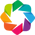

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [ ]:
hv.extension('bokeh')
forecast.hvplot()

In [ ]:
# Plot the forecast
fig = model_laundering_data.plot(forecast)

In [ ]:
#Another Visualization
fig = px.line(forecast, x='ds', y='yhat', title='Prophet Forecast')
fig.show()

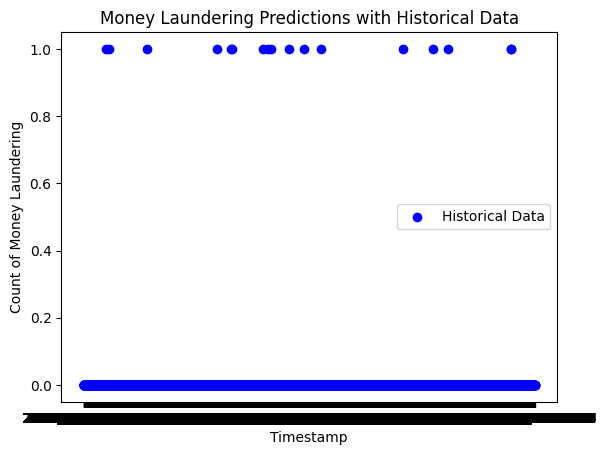

In [ ]:
# Plot the historical data as blue dots
plt.scatter(prophet_data['ds'], prophet_data['y'], color='blue', label='Historical Data')

# Customize the plot
plt.title('Money Laundering Predictions with Historical Data')
plt.xlabel('Timestamp')
plt.ylabel('Count of Money Laundering')
plt.legend()
plt.show()

In [ ]:
forecast['day_of_week'] = forecast['ds'].dt.day_name()

In [ ]:
daily_summary = forecast.groupby('day_of_week')['yhat'].sum().reset_index()

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(daily_summary['day_of_week'], daily_summary['yhat'])
plt.title('Money Laundering Susceptibility by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Predicted Count of Money Laundering')
plt.show()